#### Data Clean for housing statistics for all condos in DC

- Data is pre-cleaned as floats for all variable with a time variable
- Data is saved in "data" folder as house_preclean_data.csv

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
%matplotlib inline

In [ ]:
# Create a time variable
time_frame = pd.date_range('2010-01-01','2019-11-01', 
              freq='MS').strftime("%Y-%b").tolist()

df_temp = pd.DataFrame(time_frame, columns = ['Time'])
df = pd.read_csv("../../data/data_crosstab_condo.csv",  encoding='utf-16', sep='\t' )

In [ ]:
# reformat all housing variables from string to float

df_temp["Median Sale Price"] = df["Median Sale Price"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["Median Sale Price MoM"] = df["Median Sale Price MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Median Sale Price YoY"] = df["Median Sale Price YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["Homes Sold"] = df["Homes Sold"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["Homes Sold MoM"] = df["Homes Sold MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Homes Sold YoY"] = df["Homes Sold YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["New Listings"] = df["New Listings"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["New Listings MoM"] = df["New Listings MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["New Listings YoY"] = df["New Listings YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["Inventory"] = df["Inventory"].str.replace(",", "").str.replace("$", "").str.replace("K","000").astype(float)
df_temp["Inventory MoM"] = df["Inventory MoM "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Inventory YoY"] = df[" Inventory YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)

df_temp["Days on Market"] = df["Days on Market"]
df_temp["Days on Market MoM"] = df["Days on Market MoM"]
#df_temp["Days on Market YoY"] = df["Days on Market YoY"]



df_temp["Average Sale To List%"] = df["Average Sale To List"].str.replace(",", "").str.replace("%", "").str.replace("K","000").astype(float)
df_temp["Average Sale To List MoM"] = df["Average Sale To List MoM "].str.replace(",", "").str.replace("%", "").str.replace("K","000").astype(float)
#df_temp["Average Sale To List YoY"] = df["Average Sale To List YoY "].str.replace(",", "").str.replace("$", "").str.replace("%", "").str.replace("K","000").astype(float)


In [ ]:
df = []
df = df_temp[1:119]
df.to_csv("../../data/house_preclean_data.csv", index = False)

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

####  Set up transformed variables for housing statistics

In [7]:
df = pd.read_csv("../../data/house_preclean_data.csv")
df1 = pd.read_csv("../../data/macro.csv")

In [8]:
df.shape

(118, 13)

In [12]:
df1.shape

(117, 11)

In [ ]:
df = pd.concat([df, df1], axis=1, sort=False)
df.to_csv("../../data/full_data.csv", index = False)

In [2]:
df = pd.read_csv("../../data/full_data.csv")

In [ ]:
ax1 = sns.lineplot(x="Time", y="Median Sale Price", color = 'r', data = df)
sns.set(rc={'figure.figsize':(40,8)})
plt.xticks(range(0, 130, 10))
plt.show()

In [ ]:
plt.subplot(2, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(2, 1, 2)
sns.lineplot(x = "Time", y = "Median Sale Price MoM", data = df)
plt.xticks(range(0, 130, 10))

sns.set(rc={'figure.figsize':(40,8)})
plt.show()

In [ ]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "New Listings", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "New Listings MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

In [ ]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Homes Sold", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Homes Sold MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

In [ ]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Inventory", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Inventory MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

In [ ]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Days on Market", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Days on Market MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

In [ ]:
plt.subplot(3, 1, 1)
sns.lineplot(x = "Time", y = "Median Sale Price", data = df, color = 'r')
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 2)
sns.lineplot(x = "Time", y = "Average Sale To List%", data = df)
plt.xticks(range(0, 130, 10))
plt.subplot(3, 1, 3)
sns.lineplot(x = "Time", y = "Average Sale To List MoM", data = df)
plt.xticks(range(0, 130, 10))


sns.set(rc={'figure.figsize':(40,8)})
plt.show()

In [ ]:
df.info()

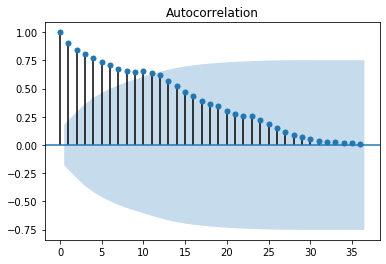

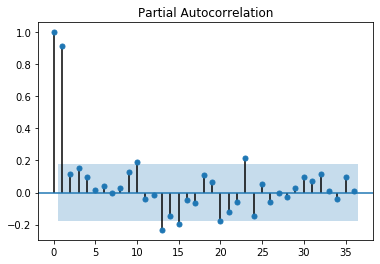

In [4]:
#plt.subplot(2, 1, 1)
plot_acf(df['Median Sale Price'], lags=36)

plot_pacf(df['Median Sale Price'], lags=36)

plt.show()

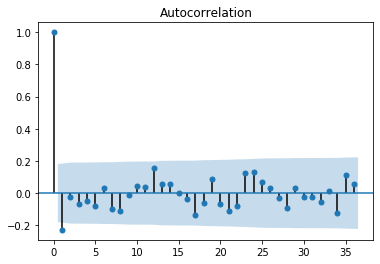

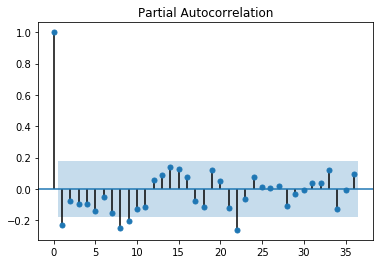

In [5]:
#plt.subplot(2, 1, 1)
plot_acf(df["Median Sale Price MoM"], lags=36)
plot_pacf(df["Median Sale Price MoM"], lags=36)

plt.show()

In [6]:
df.head()

,Time,Median Sale Price,Median Sale Price MoM,Homes Sold,Homes Sold MoM,New Listings,New Listings MoM,Inventory,Inventory MoM,Days on Market,...,WDXRSA,US_UR,DMV_UR,DC_UR,FED_EM,FIN_EM,HOS_EM,DC_PER,DMV_PER,DMV_PER_1
0,2010-Feb,250000.0,11.1,521.0,-3.9,1085.0,-2.3,3346.0,6.5,51,...,180.451677,9.8,6.9,9.7,373.444291,96.646081,254.227222,60.0,1447.651302,821.847524
1,2010-Mar,237000.0,-5.2,786.0,50.9,1681.0,54.9,3670.0,9.7,42,...,179.886193,9.9,6.7,9.5,373.911092,96.916094,258.398701,27.0,1194.393163,732.449501
2,2010-Apr,260000.0,9.7,909.0,15.6,1719.0,2.3,3892.0,6.0,28,...,181.982940,9.9,6.1,9.4,375.438325,96.709393,262.204679,166.0,1240.543680,792.792527
3,2010-May,250000.0,-3.8,988.0,8.7,1029.0,-40.1,3874.0,-0.5,30,...,182.983985,9.6,6.3,9.3,384.432209,96.954287,259.995404,15.0,1068.784557,646.662505
4,2010-Jun,240000.0,-4.0,962.0,-2.6,1260.0,22.4,3907.0,0.9,35,...,183.939947,9.4,6.5,9.3,383.827749,97.197389,261.043229,8.0,1167.185307,768.646617
